In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.corr()["Glucose"]

,Glucose
Pregnancies,0.129459
Glucose,1.000000
BloodPressure,0.152590
SkinThickness,0.057328
Insulin,0.331357
BMI,0.221071
DiabetesPedigreeFunction,0.137337
Age,0.263514
Outcome,0.466581


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [287]:
df.sum()

,0
Pregnancies,2953.000
Glucose,92847.000
BloodPressure,53073.000
SkinThickness,15772.000
Insulin,61286.000
BMI,24570.300
DiabetesPedigreeFunction,362.401
Age,25529.000
Outcome,268.000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [233]:
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=8))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [235]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100 , validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.3490 - val_accuracy: 0.7922 - val_loss: 0.5005
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8412 - loss: 0.3354 - val_accuracy: 0.7922 - val_loss: 0.5101
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8458 - loss: 0.3377 - val_accuracy: 0.7922 - val_loss: 0.5073
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8408 - loss: 0.3357 - val_accuracy: 0.7922 - val_loss: 0.5075
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3299 - val_accuracy: 0.7987 - val_loss: 0.5089
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8309 - loss: 0.3634 - val_accuracy: 0.7987 - val_loss: 0.5130
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8470 - loss: 0.3436 - val_accuracy: 0.7987 - val_loss: 0.5090
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8502 - loss: 0.3618 - val_accuracy: 0.7987 - v

In [236]:
import matplotlib.pyplot as plt


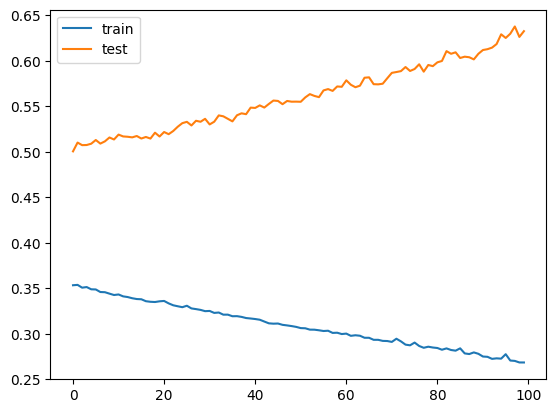

In [243]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

# *This is clearly showing that Model is Overfitting.. Means model is training to learn data rather than understanding patterns*

In [261]:
from keras.layers import Dropout, Input

model = Sequential()
model.add(Input(shape=(8,))) # Use Input layer
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [262]:
from keras.callbacks import EarlyStopping

In [263]:
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [264]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100 , validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6058 - loss: 0.6776 - val_accuracy: 0.6818 - val_loss: 0.6016
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6544 - loss: 0.6003 - val_accuracy: 0.7273 - val_loss: 0.5541
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 0.5909 - val_accuracy: 0.7273 - val_loss: 0.5219
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7536 - loss: 0.5144 - val_accuracy: 0.7468 - val_loss: 0.4992
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7191 - loss: 0.5353 - val_accuracy: 0.7662 - val_loss: 0.4820
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7489 - loss: 0.5025 - val_accuracy: 0.7727 - val_loss: 0.4702
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7196 - loss: 0.5279 - val_accuracy: 0.7727 - val_loss: 0.4632
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7487 - loss: 0.4972 - val_accuracy: 0.7597 - 

In [265]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,668 (6.52 KB)

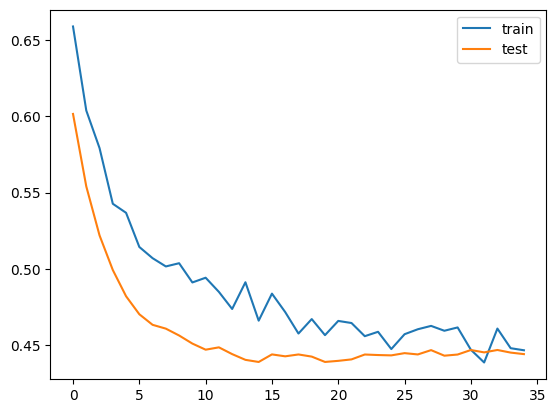

In [266]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

# **Using EarlyStopping and Dropout **

# -----------------------------------------------------------------------

In [317]:
from keras.layers import Dropout, Input

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(16, activation="tanh" , kernel_regularizer=tf.keras.regularizers.l1(0.02)))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

Adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [318]:
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=20,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

In [319]:
History = model.fit(X_train, y_train, batch_size=32, epochs=100 , validation_data=(X_test, y_test) , callbacks = ([early_stop]))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6424 - loss: 1.2529 - val_accuracy: 0.6948 - val_loss: 1.1824
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6898 - loss: 1.1694 - val_accuracy: 0.7273 - val_loss: 1.1105
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 1.1164 - val_accuracy: 0.7273 - val_loss: 1.0495
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7161 - loss: 1.0687 - val_accuracy: 0.7727 - val_loss: 0.9981
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7259 - loss: 1.0191 - val_accuracy: 0.7857 - val_loss: 0.9515
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7610 - loss: 0.9576 - val_accuracy: 0.7792 - val_loss: 0.9094
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7348 - loss: 0.9464 - val_accuracy: 0.7727 - val_loss: 0.8703
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7799 - loss: 0.8707 - val_accuracy: 0.7727 - 

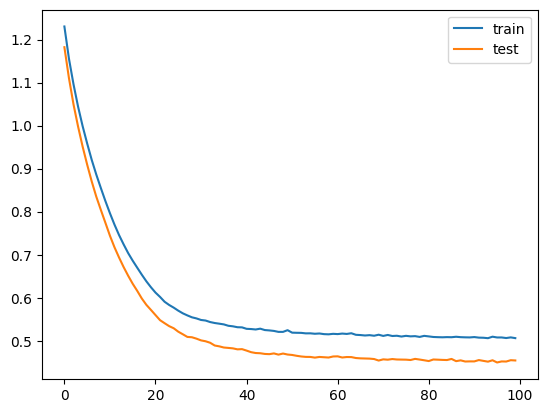

In [320]:
plt.plot(History.history["loss"], label="train")
plt.plot(History.history["val_loss"], label="test")
plt.legend()
plt.show()

 1. Hyperparameters(learning_rate, batch_size,optimizer etc.,)
 2. Regularization
 3. Dropoutlayer
 4. EarlyStoppping